192000
192000
192000
192000
192000


/Users/aof/vc/v2/.venv/lib/python3.12/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


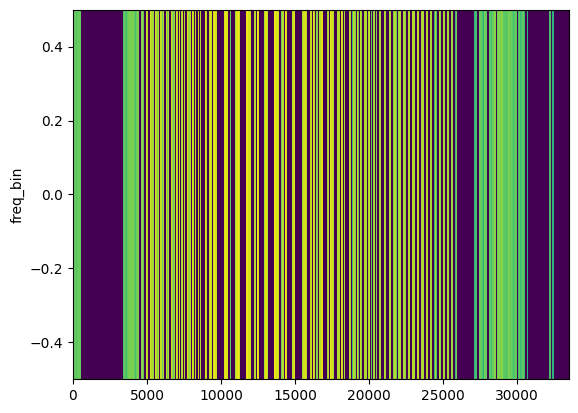

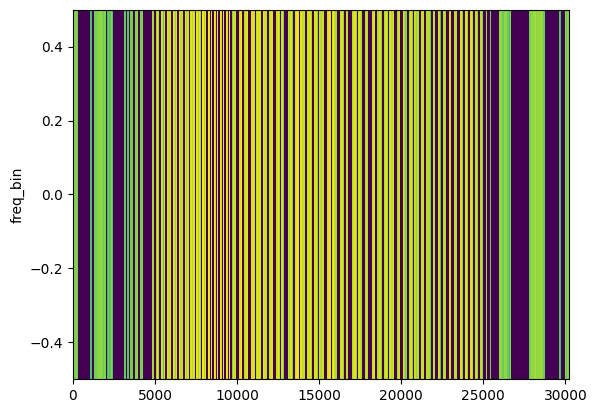

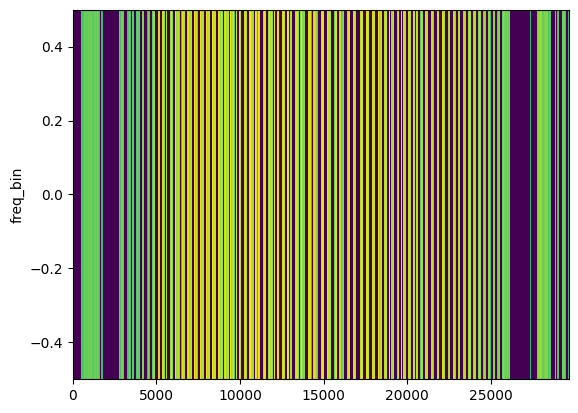

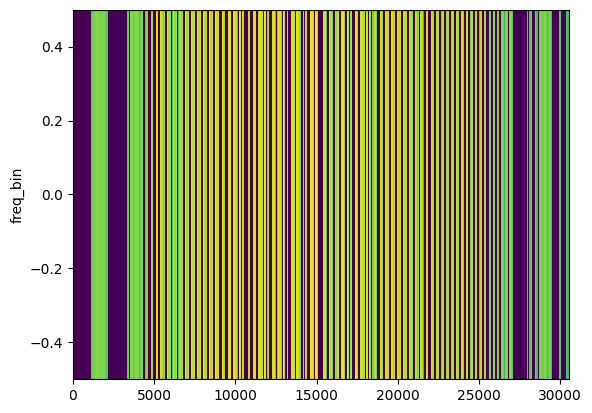

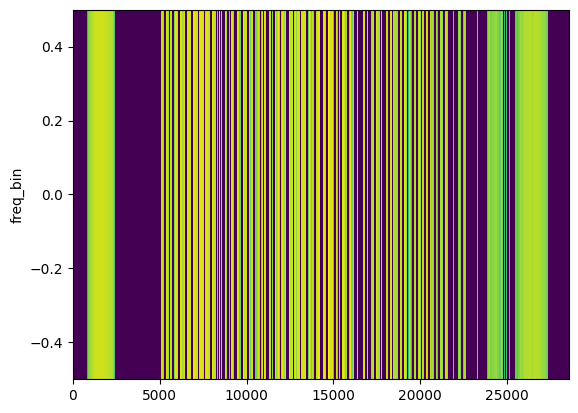

In [5]:
import torchaudio, random, torch
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import IPython.display as ipd
from torchaudio import transforms

def load_audio(file_name):
    data,sr = torchaudio.load(f"data/{file_name}.wav")
    return (data, sr)

def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)

def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")

def process():
  # data1, sr1 = load_audio(f"1_1")
  # print(data1)
  # a1 = resize_same_shape((data1, sr1), 44100)


  for i in range(1, 6):
    data1, sr1 = load_audio(f"1_{i}")
    data = (data1, sr1)
    r_data = rechannel(data, 2)
    p_data = pad_trunc(r_data, 4000)
    spec = transforms.MelSpectrogram(sr1)(data1)
    # spec = transforms.AmplitudeToDB(top_db=80)(spec)
    plot_spectrogram(data1)
    # plot_waveform(data1, sr1)
    # plt.figure(figsize=(14, 5))
    # librosa.display.waveshow(spec, sr=p_data[1])

    # sgram = librosa.stft(data1.numpy())
    # librosa.display.specshow(sgram)
    # ipd.display(ipd.Audio(p_data[0],rate=p_data[1]))
    # Audio(p_data[0])
    # print('p data', p_data)
    # plt.plot(p_data[0].numpy())
    # plt.show()
    # print(r_data[0].numpy())       
    #     t1 = torchaudio.transforms.Resample(sr1, 48000)
    #     waveform1 = t1(data1)
    #     sig, sr = resize_same_shape((data1, sr1), 4000) 
    #     spec1 = mel(sig, sr)
    #     print('spec1', spec1)

    #     data2, sr2 = load_audio(f"2_{i}")
    #     t2 = torchaudio.transforms.Resample(sr2, 48000)
    #     waveform2 = t2(data2)
        # print(waveform2.shape)


def rechannel(aud, new_channel):
  sig, sr = aud

  if (sig.shape[0] == new_channel):
      # Nothing to do
    return aud

  if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
    resig = sig[:1, :]
  else:
      # Convert from mono to stereo by duplicating the first channel
    resig = torch.cat([sig, sig])

  return ((resig, sr))

def pad_trunc(aud, max_ms):
  sig, sr = aud
  num_rows, sig_len = sig.shape
  max_len = sr//1000 * max_ms
  print(max_len)
  if sig_len > max_len:
    sig = sig[:, :max_len]
  else:
    pad_begin_len  = random.randint(0, max_len - sig_len)
    pad_end_len = max_len - sig_len - pad_begin_len

    pad_begin = torch.zeros((num_rows, pad_begin_len))
    pad_end = torch.zeros((num_rows, pad_end_len))
    sig = torch.cat((pad_begin, sig, pad_end), 1)
  
  return (sig, sr)

def time_shift(aud, shift_limit):
  sig,sr = aud
  _, sig_len = sig.shape
  shift_amt = int(random.random() * shift_limit * sig_len)
  return (sig.roll(shift_amt), sr)
  
def mel(sig, sr):
  transform = torchaudio.transforms.MelSpectrogram(sr)
  spec = transform(sig)
  top_db = 80
  spec = torchaudio.transforms.AmplitudeToDB(top_db=top_db)(spec)
  print(spec.shape)
  return spec


#import numpy as np
#n_arr = np.array([1,2,3,4])
#plt.plot(n_arr)
#plt.show()
process()


In [7]:
import torch 
  
# define tensors 
tens_1 = torch.Tensor([[11, 12, 13], [14, 15, 16]]) 
tens_2 = torch.Tensor([[17, 18, 19], [20, 21, 22]]) 
  
# print first tensors 
print("tens_1 \n", tens_1) 
  
# print second tensor 
print("tens_2 \n", tens_2) 
  
# call torch,cat() function 
# join tensor in -1 dimension 
tens = torch.cat((tens_1, tens_2), -1) 
print("join tensors in the -1 dimension \n", tens) 
  
# join tensor in 0 dimension 
tens = torch.cat((tens_1, tens_2), 0) 
print("join tensors in the 0 dimension \n", tens) 

tens_1 
 tensor([[11., 12., 13.],
        [14., 15., 16.]])
tens_2 
 tensor([[17., 18., 19.],
        [20., 21., 22.]])
join tensors in the -1 dimension 
 tensor([[11., 12., 13., 17., 18., 19.],
        [14., 15., 16., 20., 21., 22.]])
join tensors in the 0 dimension 
 tensor([[11., 12., 13.],
        [14., 15., 16.],
        [17., 18., 19.],
        [20., 21., 22.]])


https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

https://goo.gl/8hY5ER